Logistic Regression is a Supervised Machine Learning Algorithm it is Used when there is a Classifiacation Problem

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series,DataFrame

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

Check our data is of what type by seeing what type of results it has

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [8]:
df.describe()  # It will describe our Data Set

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [11]:
x = df[['EstimatedSalary','Age']].values

In [12]:
x

array([[ 19000,     19],
       [ 20000,     35],
       [ 43000,     26],
       [ 57000,     27],
       [ 76000,     19],
       [ 58000,     27],
       [ 84000,     27],
       [150000,     32],
       [ 33000,     25],
       [ 65000,     35],
       [ 80000,     26],
       [ 52000,     26],
       [ 86000,     20],
       [ 18000,     32],
       [ 82000,     18],
       [ 80000,     29],
       [ 25000,     47],
       [ 26000,     45],
       [ 28000,     46],
       [ 29000,     48],
       [ 22000,     45],
       [ 49000,     47],
       [ 41000,     48],
       [ 22000,     45],
       [ 23000,     46],
       [ 20000,     47],
       [ 28000,     49],
       [ 30000,     47],
       [ 43000,     29],
       [ 18000,     31],
       [ 74000,     31],
       [137000,     27],
       [ 16000,     21],
       [ 44000,     28],
       [ 90000,     27],
       [ 27000,     35],
       [ 28000,     33],
       [ 49000,     30],
       [ 72000,     26],
       [ 31000,     27],


In [13]:
y = df['Purchased'].values

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

Now Split up the data for Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=472)

Convert int. values into float value

In [17]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [18]:
x_train

array([[5.80e+04, 2.70e+01],
       [1.18e+05, 2.60e+01],
       [1.70e+04, 3.00e+01],
       [2.30e+04, 4.60e+01],
       [8.70e+04, 4.10e+01],
       [2.20e+04, 4.50e+01],
       [8.00e+04, 2.50e+01],
       [8.30e+04, 6.00e+01],
       [1.48e+05, 2.90e+01],
       [3.20e+04, 2.60e+01],
       [2.70e+04, 2.40e+01],
       [1.44e+05, 3.60e+01],
       [1.60e+04, 2.60e+01],
       [3.40e+04, 5.30e+01],
       [8.30e+04, 2.90e+01],
       [1.22e+05, 3.90e+01],
       [1.33e+05, 5.60e+01],
       [5.20e+04, 3.60e+01],
       [5.20e+04, 4.10e+01],
       [3.80e+04, 3.50e+01],
       [5.00e+04, 3.80e+01],
       [8.40e+04, 2.70e+01],
       [1.25e+05, 5.50e+01],
       [7.40e+04, 4.90e+01],
       [7.50e+04, 4.00e+01],
       [6.00e+04, 3.30e+01],
       [6.80e+04, 1.80e+01],
       [8.00e+04, 4.20e+01],
       [7.20e+04, 2.10e+01],
       [4.10e+04, 4.80e+01],
       [1.17e+05, 4.60e+01],
       [8.90e+04, 2.40e+01],
       [1.13e+05, 3.30e+01],
       [3.00e+04, 4.80e+01],
       [4.30e+

# Feature Scaling

converts float value in between 0 and 1 which will reduce the processing time

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc  = StandardScaler()

In [21]:
x_train = sc.fit_transform(x_train)    #'fit' Store the value at backhend

Plot values in a graph and when the points get plot in the graph it forms a Sigmoid line 

Formula of sigmoid line is

h_theta(x) =          1
            -----------------------
            1 + e^{-(beta0 + beta1(x))}
            
y = mx+c   : beta1(x) = mx , beta0 = c

In [22]:
x_test = sc.transform(x_test)

In [23]:
x_test

array([[-0.309598  ,  0.12278681],
       [-0.3689933 , -0.06981995],
       [ 0.28435499,  0.12278681],
       [-1.05203924,  0.89321384],
       [ 1.68014452, -0.16612333],
       [ 1.26437743,  0.02648343],
       [-0.04231915, -0.64764022],
       [-0.96294629, -0.93655036],
       [-1.55689928, -1.12915712],
       [ 0.1061691 ,  0.12278681],
       [ 0.58133149, -0.7439436 ],
       [-0.33929565, -0.64764022],
       [-1.37871338, -1.32176388],
       [ 0.0467738 ,  0.31539357],
       [ 0.37344794, -1.70697739],
       [-1.37871338,  0.89321384],
       [ 0.0467738 ,  0.02648343],
       [ 0.19526205, -1.80328077],
       [ 0.46254089, -1.80328077],
       [ 0.07647145, -1.12915712],
       [-0.1908074 ,  0.31539357],
       [ 0.55163384,  0.79691046],
       [-0.42838859,  0.02648343],
       [-1.46780633, -1.41806726],
       [ 2.27409751, -0.06981995],
       [-0.75506274,  1.18212398],
       [ 0.31405264, -0.84024698],
       [ 1.35347038, -0.35873009],
       [ 0.49223854,

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model = LogisticRegression()  # By default Threshold = 0.5 if x<0.5 = 0 and x>0.5 = 1

In [26]:
log_model.fit(x_test,y_test)

LogisticRegression()

By adding values of 'x_test' in 'y_pred' we get the predicted values using the above formula

In [27]:
y_pred  = log_model.predict(x_test)

In [28]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

To check how accurate our prediction was we check by using accurace_score

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
score  = accuracy_score(y_test,y_pred)  

In [31]:
score

0.825

In [32]:
# from sklearn import metrics
# score = metrics.accuracy_score(y_test,y_pred)
# score

To how that how many actual values and predicted values were correct and wrong we use Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm= confusion_matrix(y_test,y_pred)

In [35]:
cm

array([[49,  4],
       [10, 17]], dtype=int64)

In [36]:
import seaborn as sns

<AxesSubplot:>

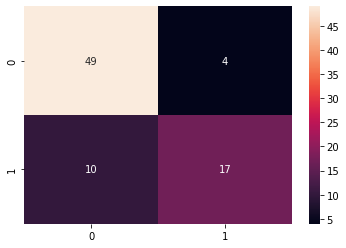

In [37]:
sns.heatmap(cm,annot =True)

In [38]:
from sklearn.metrics import classification_report

To Check Precision and recall We use classifciation report

Precision means checking False Negative values

Recall means checking False Positive values

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88        53
           1       0.81      0.63      0.71        27

    accuracy                           0.82        80
   macro avg       0.82      0.78      0.79        80
weighted avg       0.82      0.82      0.82        80

